# LinkedIn Analysis

Initially, our primary objective for the project was to analyze Researchpreneurs' LinkedIn data and advertising tools with the intention of effectively targeting the appropriate users and driving traffic to the company's website, thereby boosting registration rates. However, we soon discovered a significant issue: the data we obtained from their LinkedIn platform did not align with our goal of increasing user sign-ups on their website.

Even though we adjusted the scope of our project, we remained committed to assisting Researchpreneurs by offering valuable insights based on their current LinkedIn data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Followers

In [ ]:
df_followers = pd.read_csv('linkedin_data/followers_job.csv')
df_followers

,Job function,Total followers
0,Engineering,166
1,Business Development,155
2,Research,117
3,Education,80
4,Information Technology,47
5,Marketing,47
6,Operations,39
7,Arts and Design,34
8,Sales,34
9,Community and Social Services,33


In [ ]:
total_followers = df_followers['Total followers'].sum()

# Calculate the percentage of each 'Job function'
df_followers['Percentage'] = (df_followers['Total followers'] / total_followers) * 100

In [ ]:
df_followers.head(10)

,Job function,Total followers,Percentage
0,Engineering,166,17.025641
1,Business Development,155,15.897436
2,Research,117,12.000000
3,Education,80,8.205128
4,Information Technology,47,4.820513
5,Marketing,47,4.820513
6,Operations,39,4.000000
7,Arts and Design,34,3.487179
8,Sales,34,3.487179
9,Community and Social Services,33,3.384615


The job functions of "Engineering" and "Business Development" have the highest total number of followers, accounting for approximately 17.03% and 15.90% of the total followers, respectively. These two categories appear to be the most popular among the LinkedIn audience in the dataset. The "Research" and "Education" job functions also demonstrate a notable presence on LinkedIn, with around 12.00% and 8.21% of the total followers, respectively. Tech-Related Functions Hold Influence: "Information Technology" and "Marketing" job functions each have around 4.82% of the total followers, highlighting the significance of tech-related and marketing roles in the LinkedIn community.

## Content Metrics

In [ ]:
df_posts = pd.read_csv('linkedin_data/posts.csv')
df_posts

,Post title,Post link,Post type,Campaign name,Posted by,Created date,Campaign start date,Campaign end date,Audience,Impressions,Views (Excluding offsite video views),Offsite Views,Clicks,Click through rate (CTR),Likes,Comments,Reposts,Follows,Engagement rate,Content Type
0,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,"Alevtina Evgrafova, PhD, ACC ICF",07/21/2023,NaN,NaN,All followers,26,NaN,NaN,6,0.230769,0,0,0,NaN,0.230769,NaN
1,Wondering what are latest technology trends? K...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,"Alevtina Evgrafova, PhD, ACC ICF",07/20/2023,NaN,NaN,All followers,204,NaN,NaN,5,0.024510,3,0,0,NaN,0.039216,NaN
2,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,"Alevtina Evgrafova, PhD, ACC ICF",07/13/2023,NaN,NaN,All followers,43,NaN,NaN,2,0.046512,0,0,0,NaN,0.046512,NaN
3,Business innovations are based on such applied...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,"Alevtina Evgrafova, PhD, ACC ICF",07/08/2023,NaN,NaN,All followers,536,NaN,NaN,9,0.016791,5,0,0,NaN,0.026119,NaN
4,💜 We deeply appreciate the dedication of these...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,"Alevtina Evgrafova, PhD, ACC ICF",07/02/2023,NaN,NaN,All followers,91,NaN,NaN,4,0.043956,2,0,0,NaN,0.065934,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,"Welcome to Benjamin, who is our Lead Product D...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,"Alevtina Evgrafova, PhD, ACC ICF",09/29/2022,NaN,NaN,All followers,109,NaN,NaN,5,0.045872,0,0,1,NaN,0.055046,NaN
71,"We would like to welcome Rim, our SMM and Mark...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,"Alevtina Evgrafova, PhD, ACC ICF",09/28/2022,NaN,NaN,All followers,146,NaN,NaN,4,0.027397,4,0,3,NaN,0.075342,NaN
72,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,"Alevtina Evgrafova, PhD, ACC ICF",09/26/2022,NaN,NaN,All followers,118,NaN,NaN,8,0.067797,0,0,0,NaN,0.067797,NaN
73,Please take part in our 3-5 minute survey - We...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,"Alevtina Evgrafova, PhD, ACC ICF",09/23/2022,NaN,NaN,All followers,160,NaN,NaN,6,0.037500,9,0,2,NaN,0.100000,NaN


In [ ]:
# Drop reposts
df_posts.dropna(subset=['Post title'], inplace=True)
df_posts.reset_index(drop=True, inplace=True)

In [ ]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Post title                             62 non-null     object 
 1   Post link                              62 non-null     object 
 2   Post type                              62 non-null     object 
 3   Campaign name                          0 non-null      float64
 4   Posted by                              62 non-null     object 
 5   Created date                           62 non-null     object 
 6   Campaign start date                    0 non-null      float64
 7   Campaign end date                      0 non-null      float64
 8   Audience                               62 non-null     object 
 9   Impressions                            62 non-null     int64  
 10  Views (Excluding offsite video views)  16 non-null     float64
 11  Offsite 

Description:

0.	Post title: The title or headline of the LinkedIn post.
1.	Post link: The URL that directs to the LinkedIn post.
2.	Post type: The type of the post (Organic or Paid).
3.	Campaign name: The name of the advertising campaign the post was part of, if any. All the entries are NaN indicating no campaign was associated.
4.	Posted by: The name of the person or organization that posted the content.
5.	Created date: The date when the post was created.
6.	Campaign start date: The start date of the advertising campaign, if any. All the entries are NaN indicating no campaign was associated.
7.	Campaign end date: The end date of the advertising campaign, if any. All the entries are NaN indicating no campaign was associated.
8.	Audience: The audience to whom the post was targeted.
9.	Impressions: The number of times the post was shown to LinkedIn users.
10.	Views (Excluding offsite video views): The number of times the post was viewed by LinkedIn users, excluding views from offsite videos.
11.	Offsite Views: The number of views that the post got from offsite (outside of LinkedIn). All the entries are NaN suggesting no offsite views were recorded.
12.	Clicks: The number of times LinkedIn users clicked on the post.
13.	Click through rate (CTR): The percentage of impressions that resulted in a click.
14.	Likes: The number of likes the post received.
15.	Comments: The number of comments the post received.
16.	Reposts: The number of times the post was shared by LinkedIn users.
17.	Follows: The number of new followers gained as a result of the post. All the entries are NaN suggesting no new followers were gained through these posts.
18.	Engagement rate: The percentage of people who engaged with the post (through clicks, likes, comments, or shares) out of the total number of impressions.
19.	Content Type: The type of content in the post (e.g., text, image, video, etc.).

In the dataset, we have a total of 62 posts. Now, let's examine the performance of these posts. On LinkedIn, post performance can be evaluated by analyzing key metrics like impressions, engagement rate, likes, comments, and reposts. Impressions on LinkedIn refer to the number of times a post has been displayed in users' feeds. High impressions indicate that the post is being seen by a larger audience. The engagement rate on LinkedIn is calculated by comparing the total interactions (likes, comments, shares, and clicks) to the total number of impressions. A higher engagement rate signifies that the post is capturing the interest of viewers and generating meaningful interactions.

Based on the data, the majority of posts receive approximately 100 to 300. This suggests that these posts are reaching a moderate audience on LinkedIn impressions. With an engagement rate of less than 0.2, it appears that there is room for improvement in capturing the audience's interest and encouraging more interactions with the posts.

## Tableau Dashboard

To further illustrate the insights from the existing LinkedIn data to Reserachpreneurs, we have also created a dashboard in Tableau.  
A detailed view of the dashboard can be found at the following link: 
https://drive.google.com/drive/folders/1U991S2bEiJqCV8iYHLCNPBGBf7k04pI6  
 
To open the downloaded dashboard, simply download the attached data and link it to the dashboard. 
 
Our first dashboard page shows some visualizations of Resarchpreneurs LinkedIn Views Breakdown. The page illustrates that most views of the company's LinkedIn posts come from people who work in business development, engineering, or education, who have a seniority level of senior or entry position and who work in SMEs. Furthermore, it shows that most of the views originate from Berlin and that the greatest interest is in the Business- as well as IT services consulting sector.  

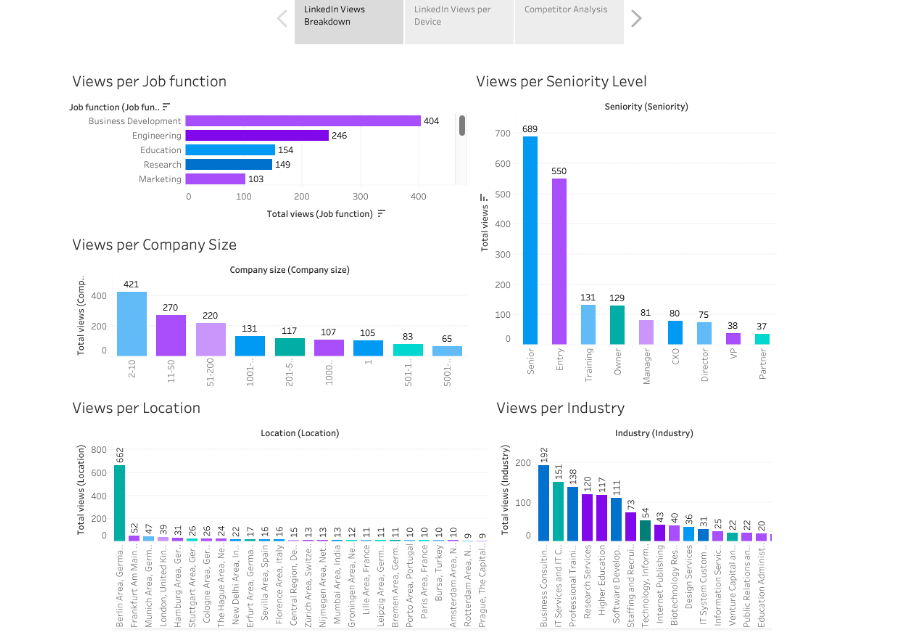

In [5]:
from IPython.display import Image
Image(filename='image_files/Dashboard1.png') 
